## Kings County Real Estate Analysis

Please fill out:
* Student name: Andrew Bennett
* Student pace: self paced / part time / full time
* Scheduled project review date/time: TBD
* Instructor name: Morgan Jones
* Blog post URL: TBD


## Project Overview
A Seattle real estate brokerage wants to expand their services to developers. They're offering "state of the art" data analysis to guide clients on where and what to build, as it relates to price.

This analysis would include, at a minimum, a linear regression model to examine the relationship between square footage and zip code on price. They'd also like to see how other factors, such as lot size, bedrooms, bathrooms, floors, affect the price, if at all.

## Business Understanding
The Seattle real estate market is always competitive. To stay ahead of the competition, a brokerage firm must attract new clients and keep them. To do this, KRG Realty is providing a data analytics package to lure buyers and sellers and developers to their business. This new package would provide linear regression modeling to analyze the relationship between square footage and zipcode at a minimum, as well as other factors such as lot size, bedrooms, bathrooms, floors, etc. 

## Data
To perform this analysis, we're utilizing data from the Kings County House Sales dataset in the form of a csv file (`data/kc_house_data.csv`).

### Step 1
Let's import the data and see what it looks like.

In [173]:
# Your code here - remember to use markdown cells for comments as well!
import pandas as pd

kc = pd.read_csv('data/kc_house_data.csv')
kc.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,greenbelt,...,sewer_system,sqft_above,sqft_basement,sqft_garage,sqft_patio,yr_built,yr_renovated,address,lat,long
0,7399300360,5/24/2022,675000.0,4,1.0,1180,7140,1.0,NO,NO,...,PUBLIC,1180,0,0,40,1969,0,"2102 Southeast 21st Court, Renton, Washington ...",47.461975,-122.19052
1,8910500230,12/13/2021,920000.0,5,2.5,2770,6703,1.0,NO,NO,...,PUBLIC,1570,1570,0,240,1950,0,"11231 Greenwood Avenue North, Seattle, Washing...",47.711525,-122.35591
2,1180000275,9/29/2021,311000.0,6,2.0,2880,6156,1.0,NO,NO,...,PUBLIC,1580,1580,0,0,1956,0,"8504 South 113th Street, Seattle, Washington 9...",47.502045,-122.22520
3,1604601802,12/14/2021,775000.0,3,3.0,2160,1400,2.0,NO,NO,...,PUBLIC,1090,1070,200,270,2010,0,"4079 Letitia Avenue South, Seattle, Washington...",47.566110,-122.29020
4,8562780790,8/24/2021,592500.0,2,2.0,1120,758,2.0,NO,NO,...,PUBLIC,1120,550,550,30,2012,0,"2193 Northwest Talus Drive, Issaquah, Washingt...",47.532470,-122.07188


We've successfully imported the CSV file into a data frame. We can see that there are 25 columns in this dataframe. Let's go ahead and input those columns name.

In [174]:
columns = kc.columns
columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'greenbelt', 'nuisance', 'view',
       'condition', 'grade', 'heat_source', 'sewer_system', 'sqft_above',
       'sqft_basement', 'sqft_garage', 'sqft_patio', 'yr_built',
       'yr_renovated', 'address', 'lat', 'long'],
      dtype='object')

We have the column names, stored here. It looks like we have a lot of standard real estate information, coupled with other address data. Let's see which information is numeric vs which is categoric.

In [175]:
kc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30155 entries, 0 to 30154
Data columns (total 25 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             30155 non-null  int64  
 1   date           30155 non-null  object 
 2   price          30155 non-null  float64
 3   bedrooms       30155 non-null  int64  
 4   bathrooms      30155 non-null  float64
 5   sqft_living    30155 non-null  int64  
 6   sqft_lot       30155 non-null  int64  
 7   floors         30155 non-null  float64
 8   waterfront     30155 non-null  object 
 9   greenbelt      30155 non-null  object 
 10  nuisance       30155 non-null  object 
 11  view           30155 non-null  object 
 12  condition      30155 non-null  object 
 13  grade          30155 non-null  object 
 14  heat_source    30123 non-null  object 
 15  sewer_system   30141 non-null  object 
 16  sqft_above     30155 non-null  int64  
 17  sqft_basement  30155 non-null  int64  
 18  sqft_g

In [176]:
numeric_cont = ['data', 'price', 'sqft_living', 'sqft_lot', 'sqft_above',
       'sqft_basement', 'sqft_garage', 'sqft_patio', 'yr_built',
       'yr_renovated', 'lat', 'long']
numeric_disc = ['bedrooms', 'bathrooms', 'floors']
categorical = ['waterfront', 'greenbelt', 'nuisance', 'view',
       'condition', 'grade', 'heat_source', 'sewer_system', 'address']

Great, so we've got our our columns saved AND we have them saved by variable type. We're in good shape, so far. 

## Step 2 - Data Cleaning

First, let's clear out the cells that are empty. We had 30,155 entries previously

In [180]:
kc.dropna(how = "any", inplace = True)

In [181]:
kc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30111 entries, 0 to 30154
Data columns (total 25 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             30111 non-null  int64  
 1   date           30111 non-null  object 
 2   price          30111 non-null  float64
 3   bedrooms       30111 non-null  int64  
 4   bathrooms      30111 non-null  float64
 5   sqft_living    30111 non-null  int64  
 6   sqft_lot       30111 non-null  int64  
 7   floors         30111 non-null  float64
 8   waterfront     30111 non-null  object 
 9   greenbelt      30111 non-null  object 
 10  nuisance       30111 non-null  object 
 11  view           30111 non-null  object 
 12  condition      30111 non-null  object 
 13  grade          30111 non-null  object 
 14  heat_source    30111 non-null  object 
 15  sewer_system   30111 non-null  object 
 16  sqft_above     30111 non-null  int64  
 17  sqft_basement  30111 non-null  int64  
 18  sqft_g

So we eliminated ~40 entries.

## Step 3: Data Engineering - ZipCode
Let's see if we can extract the zipcode from the address. It looks as if all of our zipcodes belong to Kings County. I'm going to see if we can extract the zipcode from the address.

I'll make a function to take the zipcode from the address provided.

In [182]:
def zip98 (address):
    index = 0
    backword = address[-25:]
    if '980' in backword:
        index = backword.find('980')
    if '981' in backword:
        index = backword.find('981')
    if '98224' in backword:
        index = backword.find('98224')
    if '98288' in backword:
        index = backword.find('98288')
    if '98354' in backword:
        index = backword.find('98354')
    if backword[index:index+5].isdigit():
        return backword[:40][index:index+5]
    
kc['zipcode'] = kc['address'].apply(zip98)
kc

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,greenbelt,...,sqft_above,sqft_basement,sqft_garage,sqft_patio,yr_built,yr_renovated,address,lat,long,zipcode
0,7399300360,5/24/2022,675000.0,4,1.0,1180,7140,1.0,NO,NO,...,1180,0,0,40,1969,0,"2102 Southeast 21st Court, Renton, Washington ...",47.461975,-122.19052,98055
1,8910500230,12/13/2021,920000.0,5,2.5,2770,6703,1.0,NO,NO,...,1570,1570,0,240,1950,0,"11231 Greenwood Avenue North, Seattle, Washing...",47.711525,-122.35591,98133
2,1180000275,9/29/2021,311000.0,6,2.0,2880,6156,1.0,NO,NO,...,1580,1580,0,0,1956,0,"8504 South 113th Street, Seattle, Washington 9...",47.502045,-122.22520,98178
3,1604601802,12/14/2021,775000.0,3,3.0,2160,1400,2.0,NO,NO,...,1090,1070,200,270,2010,0,"4079 Letitia Avenue South, Seattle, Washington...",47.566110,-122.29020,98118
4,8562780790,8/24/2021,592500.0,2,2.0,1120,758,2.0,NO,NO,...,1120,550,550,30,2012,0,"2193 Northwest Talus Drive, Issaquah, Washingt...",47.532470,-122.07188,98027
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30150,7834800180,11/30/2021,1555000.0,5,2.0,1910,4000,1.5,NO,NO,...,1600,1130,0,210,1921,0,"4673 Eastern Avenue North, Seattle, Washington...",47.664740,-122.32940,98103
30151,194000695,6/16/2021,1313000.0,3,2.0,2020,5800,2.0,NO,NO,...,2020,0,0,520,2011,0,"4131 44th Avenue Southwest, Seattle, Washingto...",47.565610,-122.38851,98116
30152,7960100080,5/27/2022,800000.0,3,2.0,1620,3600,1.0,NO,NO,...,940,920,240,110,1995,0,"910 Martin Luther King Jr Way, Seattle, Washin...",47.610395,-122.29585,98122
30153,2781280080,2/24/2022,775000.0,3,2.5,2570,2889,2.0,NO,NO,...,1830,740,480,100,2006,0,"17127 114th Avenue Southeast, Renton, Washingt...",47.449490,-122.18908,98055


That looks good. Let see the zipcode counts to see how many we're working with.

In [183]:
kc['zipcode'].value_counts()

98042    992
98038    857
98103    761
98115    760
98117    748
        ... 
98039     59
98354     23
98288     16
98224      3
98050      2
Name: zipcode, Length: 77, dtype: int64

Great, it looks like we have 77 zipcodes here. That's a lot. We'll... see where this goes.

## Step 4 - Baseline data

### Square Footage and Price
To perform our analysis we're going to start with the square footage. Let's look at the distribution.

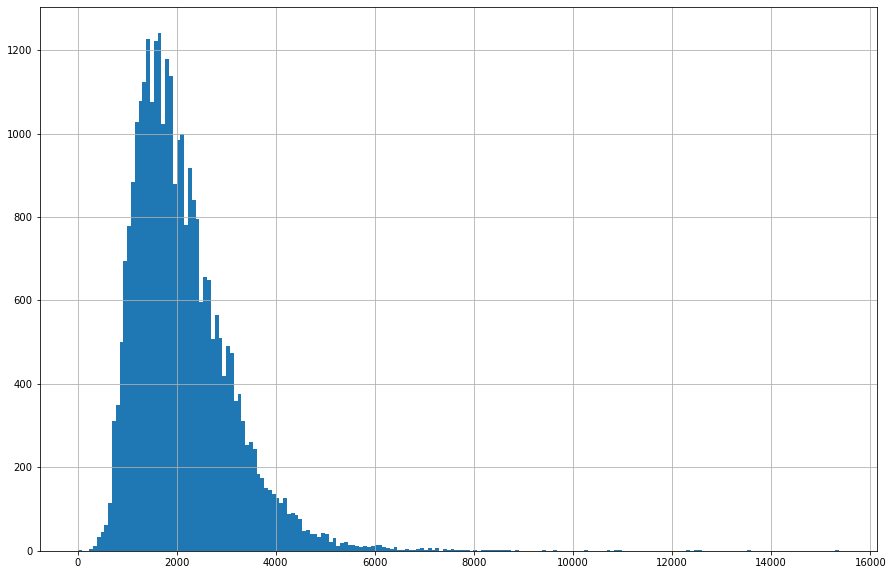

In [193]:
kc['sqft_living'].hist(figsize=(15,10), bins="auto");


As we can see above, it looks like normal curve with a slight left skew. There's also a long tail, where it appears to contain some exceptionally large size homes.

In [198]:
kc['sqft_living'].describe()

count    30111.000000
mean      2113.342798
std        973.453260
min          3.000000
25%       1420.000000
50%       1920.000000
75%       2620.000000
max      15360.000000
Name: sqft_living, dtype: float64

We can see here the maximum is quite high compared to the 75% percentile. 

Let's plot sqft vs price to see if it's a good candidate for linear regression.

<AxesSubplot:xlabel='sqft_living', ylabel='price'>

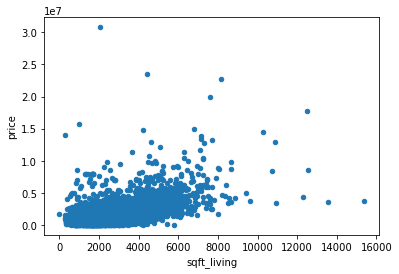

In [199]:
kc.plot.scatter("sqft_living","price")

Whelp, let's take a dive into the data and see what's what.

In [200]:
import statsmodels.api as sm
baseline_model = sm.OLS(kc['price'], sm.add_constant(kc['sqft_living']))
baseline_results = baseline_model.fit()

print(baseline_results.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.370
Model:                            OLS   Adj. R-squared:                  0.370
Method:                 Least Squares   F-statistic:                 1.771e+04
Date:                Fri, 04 Aug 2023   Prob (F-statistic):               0.00
Time:                        15:32:22   Log-Likelihood:            -4.4847e+05
No. Observations:               30111   AIC:                         8.969e+05
Df Residuals:                   30109   BIC:                         8.970e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -7.559e+04   9798.815     -7.714      

## Results Discussion

The model overall explains about 37% of the variance in sale price, which is low.

Using the standard alpha of 0.05 to evaluate statistical significance:

Coefficients for the intercept as well sqft_living are all statistically significant.
The coefficients for the intercept